In [167]:
import pandas as pd
water = pd.read_csv('water-treatment.data', header= -1)
water.columns = ['NUL','Q_E', 'ZN_E', 'PH_E', 'DBO_E', 'DQO_E', 'SS_E',
    'SSV_E', 'SED_E', 'COND_E', 'PH_P', 'DBO_P', 'SS_P', 'SSV_P', 'SED_P', 'COND_P',
    'PH_D', 'DBO_D', 'DQO_D', 'SS_D', 'SSV_D', 'SED_D' , 'COND_D', 'PH_S', 'DBO_S',
    'DQO_S', 'SS_S', 'SSV_S', 'SED_S', 'COND_S', 'RD_DBO_P', 'RD_SS_P', 'RD_SED_P',
    'RD_DBO_S', 'RD_DQO_S', 'RD_DBO_G', 'RD_DQO_G', 'RD_SS_G', 'RD_SED_G' ]

In [168]:
newater = water.drop(['NUL'],axis=1)
newater.head()
import numpy as np
nan = np.nan
newater1 = newater.replace(to_replace ="?", value ='NaN')

In [169]:
from missingpy import KNNImputer

imputer = KNNImputer()
X_imputed = imputer.fit_transform(newater1)

c:\users\sagar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)
c:\users\sagar\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\utils\validation.py:432: DeprecationWarning: 'warn_on_dtype' is deprecated in version 0.21 and will be removed in 0.23. Don't set `warn_on_dtype` to remove this warning.
  DeprecationWarning)


In [170]:
X_imputed

array([[4.41010e+04, 1.50000e+00, 7.80000e+00, 1.47600e+02, 4.07000e+02,
        1.66000e+02, 6.63000e+01, 4.50000e+00, 2.11000e+03, 7.90000e+00,
        1.71800e+02, 2.28000e+02, 7.02000e+01, 5.50000e+00, 2.12000e+03,
        7.90000e+00, 1.07200e+02, 2.80000e+02, 9.40000e+01, 7.23000e+01,
        3.00000e-01, 2.01000e+03, 7.30000e+00, 1.72000e+01, 8.40000e+01,
        2.10000e+01, 8.10000e+01, 2.00000e-02, 2.00000e+03, 3.44000e+01,
        5.88000e+01, 9.55000e+01, 8.37600e+01, 7.00000e+01, 8.79200e+01,
        7.94000e+01, 8.73000e+01, 9.96000e+01],
       [3.90240e+04, 3.00000e+00, 7.70000e+00, 1.67200e+02, 4.43000e+02,
        2.14000e+02, 6.92000e+01, 6.50000e+00, 2.66000e+03, 7.70000e+00,
        1.77000e+02, 2.44000e+02, 7.54000e+01, 7.70000e+00, 2.57000e+03,
        7.60000e+00, 1.14800e+02, 4.74000e+02, 9.60000e+01, 7.92000e+01,
        4.00000e-01, 2.70000e+03, 7.50000e+00, 2.28000e+01, 9.10000e+01,
        1.70000e+01, 9.41000e+01, 0.00000e+00, 2.59000e+03, 3.34600e+01,
   

In [154]:
from sklearn.preprocessing import MinMaxScaler
X_std1 = pd.DataFrame(MinMaxScaler().fit_transform(newater1))

In [54]:
from sklearn.feature_selection import VarianceThreshold 
selector = VarianceThreshold()
data = pd.DataFrame(selector.fit_transform(X_std1))

In [34]:
summary = X_std1.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
0,527.0,0.961867,0.181105,0.000000,0.995142,9.966406e-01,9.976206e-01,0.999648
1,527.0,0.000086,0.000180,0.000000,0.000024,4.221699e-05,8.117504e-05,0.002237
2,527.0,0.000292,0.000412,0.000126,0.000190,2.177910e-04,2.372967e-04,0.003213
3,527.0,0.006764,0.009705,0.000000,0.003755,4.967735e-03,6.546294e-03,0.088579
4,527.0,0.015413,0.023826,0.000000,0.008279,1.121959e-02,1.415768e-02,0.215379
5,527.0,0.008390,0.012293,0.000000,0.004458,5.618199e-03,7.209002e-03,0.102697
6,527.0,0.002317,0.003541,0.000000,0.001399,1.728613e-03,2.077291e-03,0.029337
7,527.0,0.000162,0.000240,0.000000,0.000076,1.165758e-04,1.588642e-04,0.002354
8,527.0,0.055964,0.081274,0.010832,0.032540,3.902358e-02,4.692153e-02,0.517174
9,527.0,0.000293,0.000415,0.000126,0.000190,2.175100e-04,2.378936e-04,0.003255


In [171]:
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 


# Calculate min and max for each column
minmax = dataset_minmax(X_imputed)
print(minmax)

[[10050.0, 60081.0], [0.1, 33.5], [6.9, 8.7], [31.0, 438.0], [81.0, 941.0], [98.0, 2008.0], [13.2, 85.0], [0.4, 36.0], [651.0, 3230.0], [7.3, 8.5], [32.0, 517.0], [104.0, 1692.0], [7.1, 93.5], [1.0, 46.0], [646.0, 3170.0], [7.1, 8.4], [26.0, 285.0], [80.0, 511.0], [49.0, 244.0], [20.2, 100.0], [0.0, 3.5], [85.0, 3690.0], [7.0, 9.7], [3.0, 320.0], [9.0, 350.0], [6.0, 238.0], [29.2, 100.0], [0.0, 3.5], [683.0, 3950.0], [0.6, 79.1], [5.3, 96.1], [7.7, 100.0], [8.2, 94.7], [1.4, 96.8], [19.6, 97.0], [19.2, 98.1], [10.3, 99.4], [36.4, 100.0]]


In [172]:
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
normalize_dataset(X_imputed, minmax)

In [173]:
lo = X_imputed
lo

array([[6.80598029e-01, 4.19161677e-02, 5.00000000e-01, 2.86486486e-01,
        3.79069767e-01, 3.56020942e-02, 7.39554318e-01, 1.15168539e-01,
        5.65723149e-01, 5.00000000e-01, 2.88247423e-01, 7.80856423e-02,
        7.30324074e-01, 1.00000000e-01, 5.83993661e-01, 6.15384615e-01,
        3.13513514e-01, 4.64037123e-01, 2.30769231e-01, 6.52882206e-01,
        8.57142857e-02, 5.33980583e-01, 1.11111111e-01, 4.47949527e-02,
        2.19941349e-01, 6.46551724e-02, 7.31638418e-01, 5.71428571e-03,
        4.03122130e-01, 4.30573248e-01, 5.89207048e-01, 9.51245937e-01,
        8.73526012e-01, 7.19077568e-01, 8.82687339e-01, 7.62991128e-01,
        8.64197531e-01, 9.93710692e-01],
       [5.79120945e-01, 8.68263473e-02, 4.44444444e-01, 3.34643735e-01,
        4.20930233e-01, 6.07329843e-02, 7.79944290e-01, 1.71348315e-01,
        7.78984102e-01, 3.33333333e-01, 2.98969072e-01, 8.81612091e-02,
        7.90509259e-01, 1.48888889e-01, 7.62282092e-01, 3.84615385e-01,
        3.42857143e-01,

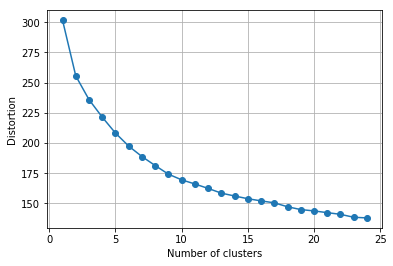

In [198]:
distortions = []
for i in range(1, 25):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=50, max_iter=200,
        tol=1e-04, random_state=0
    )
    km.fit(lo)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 25), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid(b=None)
plt.show()

In [194]:
li = pd.DataFrame(lo)

In [228]:
from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=200, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(li)

In [229]:
X1 = li

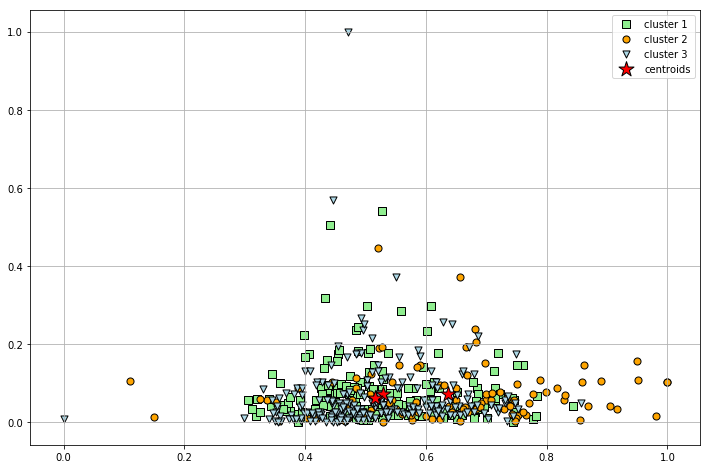

In [230]:
# plot the 3 clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))


plt.scatter(
    X1.values[y_km == 0, 0], X1.values[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X1.values[y_km == 1, 0], X1.values[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X1.values[y_km == 2, 0], X1.values[y_km == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)




plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)

plt.grid()
plt.show()